In [1]:
# GPT5 : extracting weights and biases from each layer in PyTorch is straightforward, 
# and you can do it in several ways depending on how you structured your model.

In [2]:
print('''
| Method             | Code                                          | Best for         |
| ------------------ | --------------------------------------------- | ---------------- |
| Direct             | `model.fc1.weight`                            | Few known layers |
| Loop               | `for name, param in model.named_parameters()` | Medium models    |
| `state_dict()`     | `model.state_dict()`                          | Saving / loading |
| List comprehension | `[p for n, p in model.named_parameters()]`    | Quick extraction |
''')


| Method             | Code                                          | Best for         |
| ------------------ | --------------------------------------------- | ---------------- |
| Direct             | `model.fc1.weight`                            | Few known layers |
| Loop               | `for name, param in model.named_parameters()` | Medium models    |
| `state_dict()`     | `model.state_dict()`                          | Saving / loading |
| List comprehension | `[p for n, p in model.named_parameters()]`    | Quick extraction |



In [3]:
print('''

You can get every layer’s weights and biases through .named_parameters() or .state_dict() 
— both return everything as tensors that you can inspect, modify, or save.

''')



You can get every layer’s weights and biases through .named_parameters() or .state_dict() 
— both return everything as tensors that you can inspect, modify, or save.




In [4]:
import torch
import torch.nn as nn

class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(4, 3)
        self.fc2 = nn.Linear(3, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()


In [5]:
# Access weights and biases layer by layer

In [6]:
# Option A — Direct attribute access

print("Layer 1 weight:\n", model.fc1.weight)
print("Layer 1 bias:\n", model.fc1.bias)

print("\nLayer 2 weight:\n", model.fc2.weight)
print("Layer 2 bias:\n", model.fc2.bias)


Layer 1 weight:
 Parameter containing:
tensor([[ 0.3943, -0.2221, -0.4071, -0.4590],
        [ 0.3661,  0.2552, -0.1295,  0.4063],
        [ 0.1718,  0.2025, -0.3189,  0.3821]], requires_grad=True)
Layer 1 bias:
 Parameter containing:
tensor([ 0.3646,  0.4854, -0.1835], requires_grad=True)

Layer 2 weight:
 Parameter containing:
tensor([[-0.1182, -0.4655,  0.3048],
        [ 0.2157, -0.1915, -0.0364]], requires_grad=True)
Layer 2 bias:
 Parameter containing:
tensor([-0.2613,  0.5708], requires_grad=True)


In [7]:
# You can also convert them to NumPy arrays:

w1 = model.fc1.weight.detach().numpy()
b1 = model.fc1.bias.detach().numpy()

print(w1)
print(b1)

[[ 0.39430153 -0.22207856 -0.40712857 -0.45899302]
 [ 0.36606944  0.25522935 -0.12950242  0.4062966 ]
 [ 0.17177743  0.2024656  -0.3189103   0.38212007]]
[ 0.36464638  0.4854222  -0.18354893]


In [8]:
# You can also convert them to NumPy arrays:

w2 = model.fc2.weight.detach().numpy()
b2 = model.fc2.bias.detach().numpy()

print(w2)
print(b2)

[[-0.11822709 -0.4654672   0.3048426 ]
 [ 0.21570027 -0.19147278 -0.03637408]]
[-0.26125187  0.5708135 ]


In [9]:
print(model.named_parameters())

<generator object Module.named_parameters at 0x76988951bc40>


In [10]:
# Option B — Using a loop over all layers

for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name} → weight:\n{param.data}")
    elif 'bias' in name:
        print(f"{name} → bias:\n{param.data}")


fc1.weight → weight:
tensor([[ 0.3943, -0.2221, -0.4071, -0.4590],
        [ 0.3661,  0.2552, -0.1295,  0.4063],
        [ 0.1718,  0.2025, -0.3189,  0.3821]])
fc1.bias → bias:
tensor([ 0.3646,  0.4854, -0.1835])
fc2.weight → weight:
tensor([[-0.1182, -0.4655,  0.3048],
        [ 0.2157, -0.1915, -0.0364]])
fc2.bias → bias:
tensor([-0.2613,  0.5708])


In [11]:
# Option C — Accessing via .state_dict()

# state_dict() is a dictionary containing all model parameters (weights & biases):

for name, tensor in model.state_dict().items():
    print(name, ":", tensor.shape)


fc1.weight : torch.Size([3, 4])
fc1.bias : torch.Size([3])
fc2.weight : torch.Size([2, 3])
fc2.bias : torch.Size([2])


In [12]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict({'fc1.weight': tensor([[ 0.3943, -0.2221, -0.4071, -0.4590],
        [ 0.3661,  0.2552, -0.1295,  0.4063],
        [ 0.1718,  0.2025, -0.3189,  0.3821]]), 'fc1.bias': tensor([ 0.3646,  0.4854, -0.1835]), 'fc2.weight': tensor([[-0.1182, -0.4655,  0.3048],
        [ 0.2157, -0.1915, -0.0364]]), 'fc2.bias': tensor([-0.2613,  0.5708])})


In [14]:
# Option D — Store weights/biases in lists

In [13]:
weights = [p.data for n, p in model.named_parameters() if 'weight' in n]
biases  = [p.data for n, p in model.named_parameters() if 'bias' in n]

print("All weights:", weights)
print("All biases:", biases)


All weights: [tensor([[ 0.3943, -0.2221, -0.4071, -0.4590],
        [ 0.3661,  0.2552, -0.1295,  0.4063],
        [ 0.1718,  0.2025, -0.3189,  0.3821]]), tensor([[-0.1182, -0.4655,  0.3048],
        [ 0.2157, -0.1915, -0.0364]])]
All biases: [tensor([ 0.3646,  0.4854, -0.1835]), tensor([-0.2613,  0.5708])]


In [14]:
# For convolutional or transformer layers

for name, param in model.named_parameters():
    print(name, param.shape)


fc1.weight torch.Size([3, 4])
fc1.bias torch.Size([3])
fc2.weight torch.Size([2, 3])
fc2.bias torch.Size([2])


In [15]:
def list_params(model):
    for name, p in model.named_parameters():
        print(f"{name:60s} {tuple(p.shape)}  requires_grad={p.requires_grad}")

list_params(model)  # your nn.Transformer / custom model


fc1.weight                                                   (3, 4)  requires_grad=True
fc1.bias                                                     (3,)  requires_grad=True
fc2.weight                                                   (2, 3)  requires_grad=True
fc2.bias                                                     (2,)  requires_grad=True


In [16]:
print('''

To extract a Transformer’s weights, biases, and attention parameters (and optionally the attention maps) in PyTorch.

''')



To extract a Transformer’s weights, biases, and attention parameters (and optionally the attention maps) in PyTorch.




In [17]:
from transformers import AutoModel, AutoTokenizer
import torch

name = "bert-base-uncased"  
tok = AutoTokenizer.from_pretrained(name)
model = AutoModel.from_pretrained(name, output_attentions = True)
model.eval()

inputs = tok("Hello world!", return_tensors="pt")
with torch.no_grad():
    out = model(**inputs)

# Attention maps: list over layers
# Each item: (batch, num_heads, seq_len, seq_len)
attn_maps = out.attentions
print(len(attn_maps), attn_maps[0].shape)

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


12 torch.Size([1, 12, 5, 5])


In [25]:
# Inspect / extract attention parameters per layer

# BERT naming example:
# encoder.layer.{L}.attention.self.query.weight / .bias
# ...key.weight, ...value.weight
# ...output.dense.weight / .bias

In [18]:
for name, p in model.named_parameters():
    if any(k in name for k in ["query", "key", "value", "out_proj", "output.dense"]):
        print(name, tuple(p.shape))

encoder.layer.0.attention.self.query.weight (768, 768)
encoder.layer.0.attention.self.query.bias (768,)
encoder.layer.0.attention.self.key.weight (768, 768)
encoder.layer.0.attention.self.key.bias (768,)
encoder.layer.0.attention.self.value.weight (768, 768)
encoder.layer.0.attention.self.value.bias (768,)
encoder.layer.0.attention.output.dense.weight (768, 768)
encoder.layer.0.attention.output.dense.bias (768,)
encoder.layer.0.output.dense.weight (768, 3072)
encoder.layer.0.output.dense.bias (768,)
encoder.layer.1.attention.self.query.weight (768, 768)
encoder.layer.1.attention.self.query.bias (768,)
encoder.layer.1.attention.self.key.weight (768, 768)
encoder.layer.1.attention.self.key.bias (768,)
encoder.layer.1.attention.self.value.weight (768, 768)
encoder.layer.1.attention.self.value.bias (768,)
encoder.layer.1.attention.output.dense.weight (768, 768)
encoder.layer.1.attention.output.dense.bias (768,)
encoder.layer.1.output.dense.weight (768, 3072)
encoder.layer.1.output.dense.bi

In [19]:
# Example: get the Q/K/V and output projection for layer L:

In [20]:
L = 0
qry_W = dict(model.named_parameters())[f"encoder.layer.{L}.attention.self.query.weight"]
qry_b = dict(model.named_parameters())[f"encoder.layer.{L}.attention.self.query.bias"]
key_W = dict(model.named_parameters())[f"encoder.layer.{L}.attention.self.key.weight"]
val_W = dict(model.named_parameters())[f"encoder.layer.{L}.attention.self.value.weight"]
out_W = dict(model.named_parameters())[f"encoder.layer.{L}.attention.output.dense.weight"]
out_b = dict(model.named_parameters())[f"encoder.layer.{L}.attention.output.dense.bias"]

In [21]:
print("=== Layer", L, "===")
print("Query weight:", qry_W.shape)
print("Query bias:", qry_b.shape)
print("Key weight:", key_W.shape)
print("Value weight:", val_W.shape)
print("Output weight:", out_W.shape)
print("Output bias:", out_b.shape)

=== Layer 0 ===
Query weight: torch.Size([768, 768])
Query bias: torch.Size([768])
Key weight: torch.Size([768, 768])
Value weight: torch.Size([768, 768])
Output weight: torch.Size([768, 768])
Output bias: torch.Size([768])


In [22]:
import pandas as pd

pd.DataFrame({
    "Param": ["query.weight", "query.bias", "key.weight", "value.weight", "output.weight", "output.bias"],
    "Shape": [tuple(qry_W.shape), tuple(qry_b.shape), tuple(key_W.shape), tuple(val_W.shape), tuple(out_W.shape), tuple(out_b.shape)]
})

,Param,Shape
0,query.weight,"(768, 768)"
1,query.bias,"(768,)"
2,key.weight,"(768, 768)"
3,value.weight,"(768, 768)"
4,output.weight,"(768, 768)"
5,output.bias,"(768,)"


In [23]:
# If you want to print all attention weights/biases for every layer, just loop:

# for L in range(model.config.num_hidden_layers):
#    print(f"\n=== Layer {L} ===")
#    layer_params = dict(model.named_parameters())
#    for name in ["query", "key", "value"]:
#        w = layer_params[f"encoder.layer.{L}.attention.self.{name}.weight"]
#        b = layer_params[f"encoder.layer.{L}.attention.self.{name}.bias"]
#        print(f"{name}: {tuple(w.shape)} / {tuple(b.shape)}")

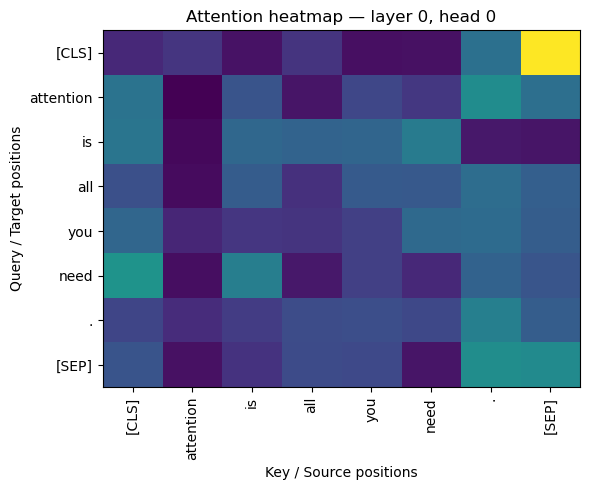

In [24]:
# !pip install transformers torch matplotlib

import torch
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel

model_name = "bert-base-uncased"  # or "gpt2", etc.
tok = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True).eval()

text = "Attention is all you need."
inputs = tok(text, return_tensors="pt")

with torch.no_grad():
    out = model(**inputs)

# Choose a layer and head
L = 0             # layer index (0-based)
head = 0          # head index (0-based)

# Shape: list over layers; each tensor: (batch, heads, seq_len, seq_len)
att = out.attentions[L][0, head]              # (seq_len, seq_len)
# Or average across heads:
# att = out.attentions[L][0].mean(dim=0)      # (seq_len, seq_len)

# Token labels for axes
tokens = tok.convert_ids_to_tokens(inputs["input_ids"][0])

# Plot (matplotlib; one figure, no specific colors)
plt.figure(figsize=(6, 5))
plt.imshow(att.cpu(), aspect='auto')
plt.title(f"Attention heatmap — layer {L}, head {head}")
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.xlabel("Key / Source positions")
plt.ylabel("Query / Target positions")
plt.tight_layout()
plt.show()
